# Data Processing

### Read CSV

actions  (13620, 2)
Lidar  (13620, 1081)


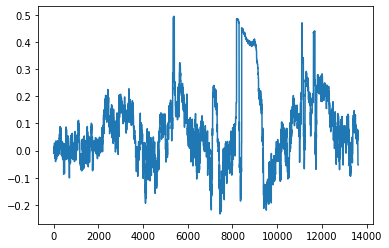

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

actions = pd.read_csv('../data/SIMULATION/RACE_1/actions.txt', sep=' ', header=None)
lidar = pd.read_csv('../data/SIMULATION/RACE_1/lidar.txt', sep=' ', header=None)
lidar_2 = pd.read_csv('../data/SIMULATION/RACE_1/lidar_p2.txt', sep=' ', header=None)
actions.columns= ['steering_angle', 'velocity']

lidar = lidar.append(lidar_2)
print("actions ", actions.shape)
print("Lidar ",lidar.shape)

sns.lineplot(data=actions['steering_angle'])

### Remove data when vehicle is in reverse and clip steering angle

In [2]:
negative_vel = actions.loc[actions['velocity'] <= 0.0]
actions = actions.drop(negative_vel.index)
lidar = lidar.drop(negative_vel.index)

In [3]:
output = pd.DataFrame(lidar.copy())
output['velocity'] = actions['velocity'].copy()
output['steering_angle'] = actions['steering_angle'].copy()

### Write to CSV

In [4]:
output.to_csv(r'../data/SIMULATION/Dataset_refined/race_1.csv', index=False, header=True)

# Combine All Bags
#### choose all files in dataset_refined folder and combine them to one file.

In [6]:
li = []

for file in glob.glob("../data/SIMULATION/Dataset_refined/*.csv"):
    df = pd.read_csv(file, sep=',')
    print(file, ": ",df.shape)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

frame.to_csv(r'../data/SIMULATION/Dataset_refined/complete.csv', index=False, header=True)
print("Total dataset: ", frame.shape)

../data/SIMULATION/Dataset_refined/race_1.csv :  (13620, 1083)
../data/SIMULATION/Dataset_refined/full_real.csv :  (18343, 1083)
Total dataset:  (31963, 1083)


##### Fix

In [5]:
complete = pd.read_csv('../data/SIMULATION/Dataset_refined/race_1.csv', sep=',')
for i in range(len(complete)):
    if complete['steering_angle'][i] > 0.4189:
        complete['steering_angle'][i] = 0.4189
    elif complete['steering_angle'][i] < -0.4189:
        complete['steering_angle'][i] = -0.4189
complete.to_csv(r'../data/SIMULATION/Dataset_refined/race_1.csv', index=False, header=True)